MSDS 432 <Br>
Mini Programming Assignment: Implement a Recursive Algorithm<Br>
Prepared by Vincent Pun

In an effort to standardize our formatting, please make sure that all work on the assignment be completed within Jupyter notebook with separate paragraphs of Python code and text discussions for each part of the assignment, as described here.  The executive summary should be at the end and tie everything together.   Submission may be made with the ipython notebook or an html/pdf export.

If your timing method is producing zeros (not granular enough), please find a different one. 

In this Mini Programming Assignment, we will explore the differences between iteration and recursion.  We will begin with the base code for recursion as described in Chapter 3 of Grokking Algorithms (Bhargava 2016).  https://github.com/egonSchiele/grokking_algorithms/blob/master/03_recursion/python/03_factorial.py

In [38]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

import pandas as pd
from pandas import Categorical 
from pandas.plotting import scatter_matrix

import seaborn as sns
import scipy.stats as stats

import os
import time
from datetime import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).<br>
<br>
Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.  
<br>
Calculate the factorial of each of the numbers using recursion.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.<br>
<br>
Organize the results of the study into a table showing the number, it's factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.<br>
<br>
Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.<br>
<br>
Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.<br>

In [139]:
#Set up Array of ten random numbers between 100 and 500 (just one array with 10 numbers)
np.random.seed(123)

sys.setrecursionlimit(5000)

array = np.sort(np.random.randint(low=100,high=500,size=10))

In [144]:
#Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, 
# or linked list, or dictionary. 
def factorial(n):

    fact = 1

    for factor in range(1, n + 1):
        fact *= factor

    return fact

factorials = [factorial(x) for x in array]

In [153]:
#Calculate the factorial of each of the numbers USING RECURSION.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.

#base code from book
def fact_recursive(x):
  if x == 1:
    return 1
  else:
    return x * fact(x-1)


In [217]:
#Check if both functions output equal results

assert factorial(9) == fact_recursive(9)

In [187]:
#For Loop
#Factorial 

time1 = []
factorial_for = []

for items in array:

    start1=time.time()
    
    factorial_for.append(factorial(items))
    
    end1 = time.time()
    
    time_iterative1 = 1000*(end1-start1)

    time1.append(time_iterative1)


In [206]:
time2 = []
fact_rec = []

for items in array:

    start2=time.time()
    
    fact_rec.append(fact_recursive(items))
    
    end2 = time.time()
    
    time_recursive2 = 1000*(end2-start2)

    time2.append(time_recursive2)

In [216]:
n = array.tolist()

df = {'Number':n,
       'Factorial':factorial_for,
       'Time (Recursion)':time2,
       'Time (For Loop)':time1}
df = pd.DataFrame(data=df)

df['Difference (Recursion - For Loop)'] = df['Time (Recursion)'] - df['Time (For Loop)']

df

,Number,Factorial,Time (Recursion),Time (For Loop),Difference (Recursion - For Loop)
0,117,3969937160808720895401959629498630647790406360168322301129748464310422041758630649341780708631240196854767624444057168110272995649603642560353748940315749184568295424000000000000000000000000000,0.427961,0.025034,0.402927
1,157,117295687942641442819215807155131552511541831623044593627324799557544824622696635505477776012587322789677057983246655387237020188804608945581290772992175589402436306154362961985393763847475223716979100487761173428095446685622490578985733324800000000000000000000000000000000000000,0.444889,0.020027,0.424862
2,183,1211079010624906224171770242040000913194755344907123328387229208384122199143398983962077168073033852647945203036376445283346314711222230177466494273255728793463071956674839497876987299889729720327479783667584731115257659422804284707863129430806869565563037239578516564219715854442393339376435200000000000000000000000000000000000000000000,0.475883,0.025272,0.450611
3,198,19815524305648002601818171204326257846611456725808373449616646563928629396065410626138298593265945324225558093942704493222553838950820027765375040827960551033001579328411138624055200727234232302046524227142061137986535960488148111891395081467526982493475408477527124840709196781511817187496273890924527108598562553359394406400000000000000000000000000000000000000000000000,0.493050,0.024796,0.468254
4,206,55999397401181624007970525662228881095168659729947683663459568612877337687103244532741481446193158669223111681827099783995223685855991394533857968704451505138207572405603545223305877760386469231760852842439470446554717967072798418218925958492128260636540143129576946167209039675309828823599001441864639500011288693462578636098658615322214400000000000000000000000000000000000000000000000000,0.524998,0.025988,0.499010
5,223,249873185435436430377698987059663362395086628984728391823112288166942630559511819124255704981537449930570629002821280463185334406128048989132838398791636205678208673855202473444935869602342296488442348182529563060454306401874514103425982529680729837954985416328663177512069858595443931833472658803081894351725778122546461871134622081830651613340173985723024483556319497604300800000000000000000000000000000000000000000000000000000,1.476049,0.094175,1.381874
6,330,282408462258387108656010655350984421358230615548447917125973819061204087953410675131671734564885871836994857584240516052408604307341165067052618235515335592584915380124888501444241764715270102858062404841105269072530716903612341880567810839552257654493601149492226043075446286770769000253550746729503424973082816170493716827307049254457005433342709751252779561887750731817363130345796960363500671701037989412254276572406991428638655860396457246350737148451362954300400237985662037640867840591473444985051111706915459551705135096581824248890720926775939456276390199877799787488537304338284684150359621520850944000000000000000000000000000000000000000000000000000000000000000000000000000000000,0.859022,0.061035,0.797987
7,422,209611383012576635876856401893914866426066372166774021105107419272349194310311448669690479132859659861580094983785283237190059139356104454480943809268951423737197619921802099702035272489020871300804426419176691976261020700182922928638458739244713639544815723484810878099548639946916348566758540770208501379361588417208280935243119770504600344079531656318416842816431857837438189657323697706428164664883595800546483387661817010631976342923673882077669505282512663645432253105415102629767347026792273289184753448697507194719203574073180686327567596741721911463018048819628257204923103613375586094654287055485186369934351227744501509631699604606237889558290765106772598640145083285151220811060746817836612987177407390236711283138099810105240401010605773792397667328544760431469273644315657274742873944639056325292778468084285440000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,0.854015,0.100851,0.753164
8,465,1417696443862767737950

([<matplotlib.axis.XTick at 0x7ff66cc6ee50>,
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Execution Time (ms)')

Text(0.5, 0, 'Number')

Text(0.5, 1.0, 'Fig 1: Execution time (ms) by Number')

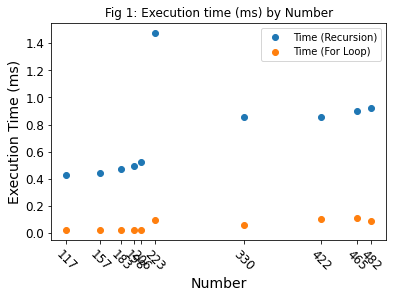

In [214]:
#Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.
plt.scatter(df['Number'], [df['Time (Recursion)']])
plt.scatter(df['Number'], [df['Time (For Loop)']])
plt.legend(('Time (Recursion)',
            'Time (For Loop)'))
plt.xticks(df['Number'], rotation=-45)
plt.ylabel('Execution Time (ms)')
plt.xlabel('Number')
plt.title('Fig 1: Execution time (ms) by Number')

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.